<a href="https://colab.research.google.com/github/sridevi0323/Animal-Hide---DL/blob/main/ANN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your desired directory
path_to_directory = '/content/drive/MyDrive/Leather_Dataset'

# Change the working directory to the specified path
os.chdir(path_to_directory)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt


In [ ]:
train_data_dir = '/content/drive/MyDrive/Leather_Dataset'
validation_data_dir = '/content/drive/MyDrive/Leather_Dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(32, activation='tanh')(x)
output = layers.Dense(1, activation='tanh')(x)

model = keras.models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Increase the learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
)
# Assuming 'history' contains accuracy values from training
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Calculate the average accuracy
average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)

print("Average Training Accuracy:", average_train_accuracy)
print("Average Validation Accuracy:", average_validation_accuracy)


Epoch 1/20
38/38 [==============================] - 149s 4s/step - loss: 1.1693 - accuracy: 0.6433 - val_loss: 0.7000 - val_accuracy: 0.6358
Epoch 2/20
38/38 [==============================] - 144s 4s/step - loss: 0.4173 - accuracy: 0.8567 - val_loss: 0.4211 - val_accuracy: 0.8183
Epoch 3/20
38/38 [==============================] - 145s 4s/step - loss: 0.3492 - accuracy: 0.9217 - val_loss: 0.4140 - val_accuracy: 0.8108
Epoch 4/20
38/38 [==============================] - 144s 4s/step - loss: 0.3541 - accuracy: 0.8975 - val_loss: 0.3885 - val_accuracy: 0.8250
Epoch 5/20
38/38 [==============================] - 107s 3s/step - loss: 0.5106 - accuracy: 0.7600 - val_loss: 0.2762 - val_accuracy: 0.8975
Epoch 6/20
38/38 [==============================] - 145s 4s/step - loss: 0.6459 - accuracy: 0.7100 - val_loss: 0.5738 - val_accuracy: 0.6850
Epoch 7/20
38/38 [==============================] - 108s 3s/step - loss: 0.4679 - accuracy: 0.7667 - val_loss: 0.4179 - val_accuracy: 0.8050
Epoch 8/20
38

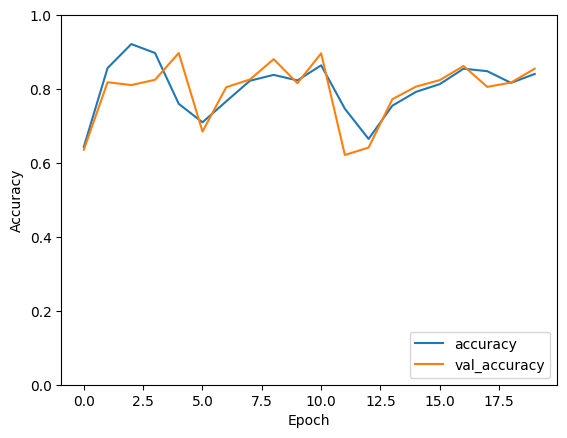

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score

# Assuming you have a validation generator and model.predict() for predictions
# Get true labels for the validation dataset
true_labels = validation_generator.classes

# Make predictions using the model
predicted_probs = model.predict(validation_generator)

# Convert predicted probabilities to binary labels
predicted_labels = (predicted_probs > 0.5).astype(int)

# Calculate precision, F1 score, and recall
precision = precision_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)


38/38 [==============================] - 66s 2s/step
Precision: 0.494750656167979
F1 Score: 0.55359765051395
Recall: 0.6283333333333333


38/38 [==============================] - 49s 1s/step


<Figure size 800x600 with 0 Axes>

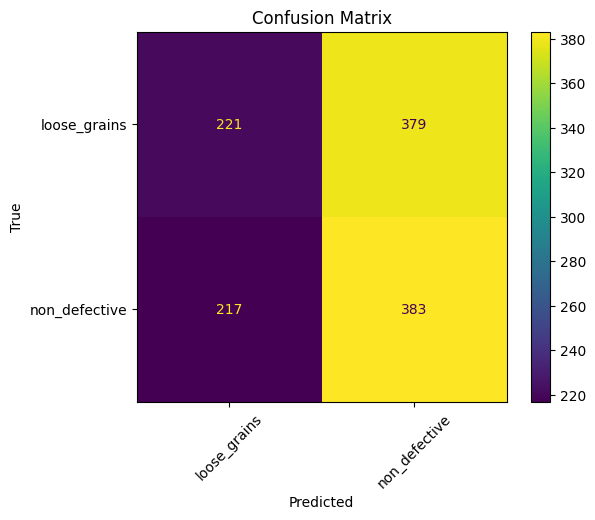

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Generate predictions for the validation dataset
validation_predictions = model.predict(validation_generator)

# Convert the predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
predicted_labels = (validation_predictions > threshold).astype(int)

# Get the true labels from the validation generator
true_labels = validation_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion, display_labels=['loose_grains', 'non_defective'])  # Replace with your class labels
disp.plot(cmap='viridis', values_format='d')

# Customize the appearance of the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()


Precision: 0.5026246719160105
Recall: 0.6383333333333333
F1 Score: 0.5624082232011747


<Figure size 800x600 with 0 Axes>

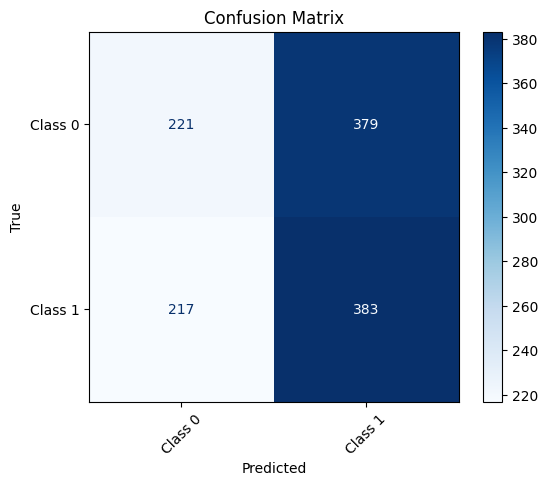

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# ... (previous code for generating predictions and the confusion matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion, display_labels=['Class 0', 'Class 1'])  # Replace with your class labels
disp.plot(cmap='Blues', values_format='d')

# Customize the appearance of the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()
